# CHAITANYA DHULIPUDI

# ---

# **Project Overview:**

<p style="font-family:newtimeroman;font-size:150%;text-alleftnter;color:#8b4513;">Sentiment Analysis on COVID-19</p>

---

## **Steps:**

1. **Data Preprocessing:**
   - Clean text (remove special characters, stopwords).
   - Tokenize and pad sequences.
   - Convert text to embeddings.

2. **Exploratory Data Analysis (EDA):**
   - Analyze tweet length and sentiment distribution.
   - Identify frequent words/hashtags.

3. **Model Building:**
   - Build **Bi-directional LSTM** with **word embeddings**.
   - Compile using **SparseCategoricalCrossentropy** and **Adam*luation of the modelling in your notebook.

# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.0_IMPORT_LIBRARIES</p>

In [3]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Data manipulation
import numpy as np
import pandas as pd

# WordCloud and NLP
from wordcloud import WordCloud
import nltk
from nltk.tokenize import TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Regular expressions
import re


In [4]:
import pandas as pd

# Updated paths since files are directly in /kaggle/input
train_path = "Corona_NLP_train.csv"
test_path = "Corona_NLP_test.csv"

# Load the files with specified encoding
try:
    train_data = pd.read_csv(train_path, encoding="ISO-8859-1")  # or encoding="latin1"
    test_data = pd.read_csv(test_path, encoding="ISO-8859-1")
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"FileNotFoundError: {e}")
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")


Files loaded successfully.


# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.1_DATA_INSPECTION</p>

In [6]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
train_data['Sentiment'].value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [8]:
def change_sen(sentiment):

    if sentiment == "Extremely Positive":

        return 'positive'

    elif sentiment == "Extremely Negative":

        return 'negative'

    elif sentiment == "Positive":

        return 'positive'

    elif sentiment == "Negative":

        return 'negative'

    else:

        return 'netural'

In [9]:
train_data['Sentiment'] = train_data['Sentiment'].apply(lambda x: change_sen(x))

test_data['Sentiment'] = test_data['Sentiment'].apply(lambda x: change_sen(x))

In [10]:
# pick any orignal tweet from dataset

train_data['OriginalTweet'][3]


"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

In [11]:
train_data['OriginalTweet'][5].lower()

'as news of the regionâ\x92s first confirmed covid-19 case came out of sullivan county last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @tim_dodson reports https://t.co/cfxch7a2lu'

In [12]:
print(train_data.shape)

print(test_data.shape)

(41157, 6)
(3798, 6)


In [13]:
print(train_data.columns)

print(test_data.columns)


Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## Data Exploration





### Columns with Null Values:



- **Location**: 3,590 null values out of 41,157 entries.





  


# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.2_MISSING VALUES</p>

In [17]:
# check the missisng value in percentage 

print(f"MISSSING VALUE IN PERCENTAGE {train_data.isnull().sum()/len(train_data)*100}")

print(f"MISSSING VALUE IN PERCENTAGE {test_data.isnull().sum()/len(train_data)*100}")

MISSSING VALUE IN PERCENTAGE UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64
MISSSING VALUE IN PERCENTAGE UserName         0.000000
ScreenName       0.000000
Location         2.026387
TweetAt          0.000000
OriginalTweet    0.000000
Sentiment        0.000000
dtype: float64


In [18]:
# remove the missing value from location column

train_data=train_data.dropna(subset=['Location'])

test_data=test_data.dropna(subset=['Location'])


# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.3_EDA</p>

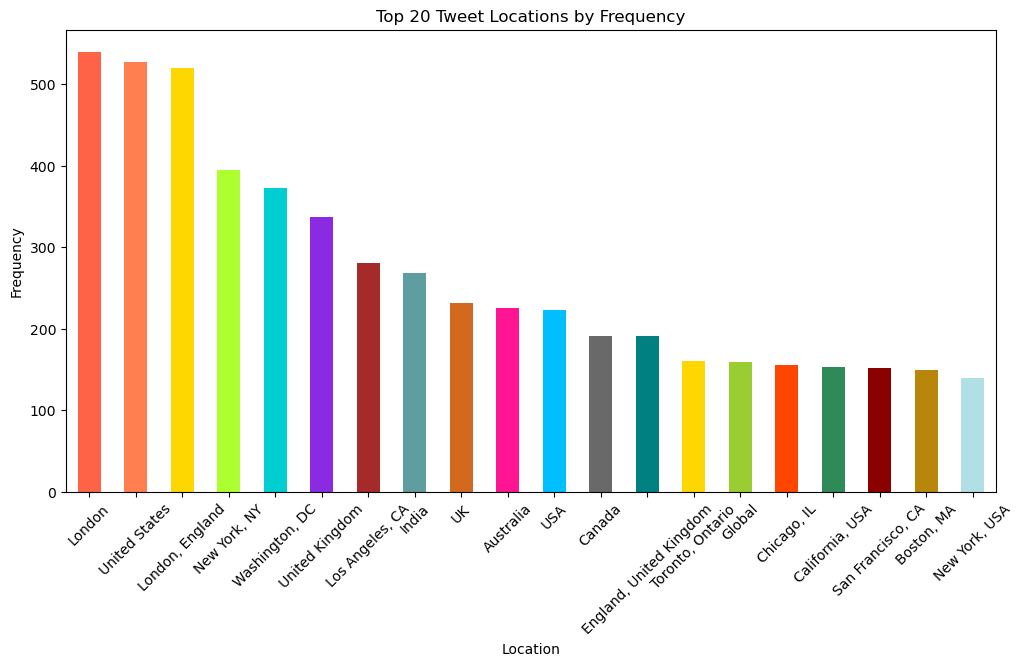

In [20]:
# Count the values in the 'Location' column and get the top 20
top_20 = train_data['Location'].value_counts().head(20)

# Custom colors for the bars
colors = ['#FF6347', '#FF7F50', '#FFD700', '#ADFF2F', '#00CED1', 
          '#8A2BE2', '#A52A2A', '#5F9EA0', '#D2691E', '#FF1493', 
          '#00BFFF', '#696969', '#008080', '#FFD700', '#9ACD32', 
          '#FF4500', '#2E8B57', '#8B0000', '#B8860B', '#B0E0E6']

# Plot the bar chart with custom colors
top_20.plot(kind='bar', color=colors, rot=45, figsize=(12, 6))

# Add title and labels
plt.title("Top 20 Tweet Locations by Frequency")
plt.ylabel('Frequency')
plt.xlabel('Location')
plt.show()


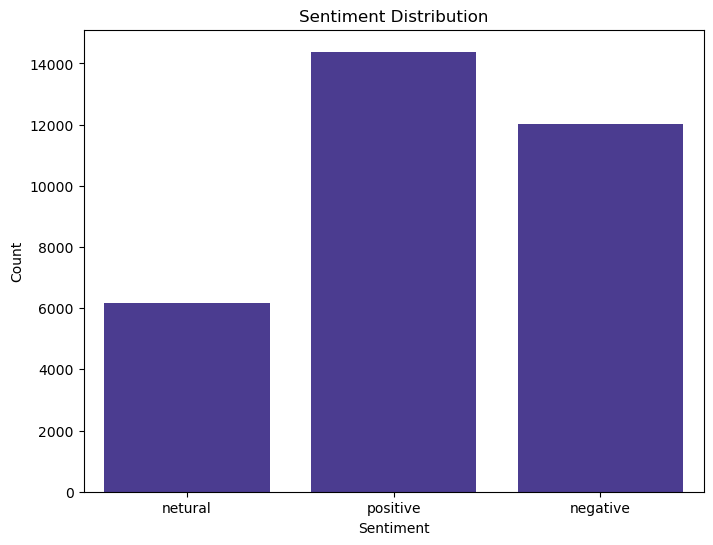

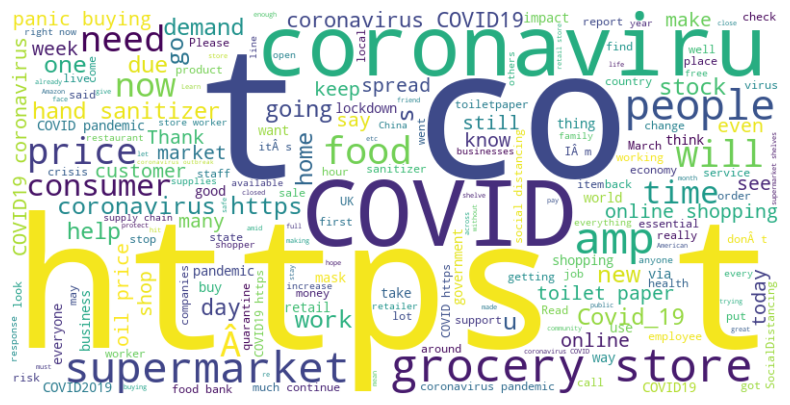

In [21]:
# Plot sentiment distribution

plt.figure(figsize=(8, 6))

sns.countplot(x='Sentiment', data=train_data, color='#422e9e')

plt.title("Sentiment Distribution")

plt.xlabel("Sentiment")

plt.ylabel("Count")

plt.show()



# Word cloud for frequently used words in 'OriginalTweet' column

text = " ".join(tweet for tweet in train_data['OriginalTweet'] if isinstance(tweet, str))  # Ensures text is string

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)



plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()


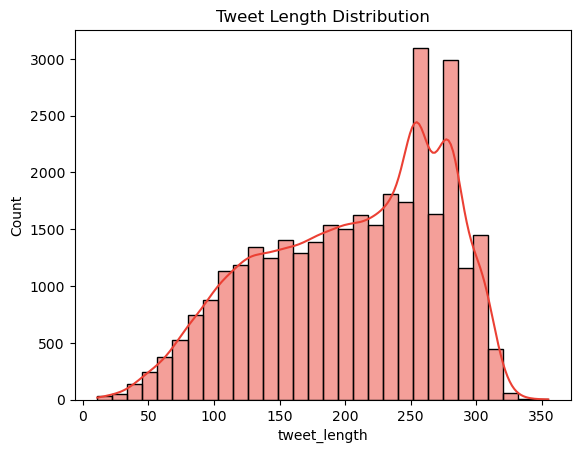

In [22]:


# Assuming train_df is already loaded with the 'tweet_length' column calculated
train_data['tweet_length'] = train_data['OriginalTweet'].apply(len)

# Plot with color palette
sns.histplot(train_data['tweet_length'], bins=30, kde=True, color="#eb4034")
plt.title("Tweet Length Distribution")
plt.show()


In [23]:
train_data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'tweet_length'],
      dtype='object')

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32567 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       32567 non-null  int64 
 1   ScreenName     32567 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        32567 non-null  object
 4   OriginalTweet  32567 non-null  object
 5   Sentiment      32567 non-null  object
 6   tweet_length   32567 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.0+ MB


In [25]:
train_data['Sentiment'].value_counts()

Sentiment
positive    14383
negative    12012
netural      6172
Name: count, dtype: int64

# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.4_PREPROCESS</p>

In [27]:
X = train_data['OriginalTweet'].copy()

y = train_data['Sentiment'].copy()

n_1')

In [29]:
def data_cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)

    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)

    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])

    return tweet


stop_words = stopwords.words('english')
X_cleaned = X.apply(data_cleaner)
X_cleaned.head()

0                                                     
1    advice Talk neighbours family exchange phone n...
2    Coronavirus Australia: Woolworths give elderly...
5    As news regionÂs first confirmed COVID- case ...
6    Cashier grocery store sharing insights To prov...
Name: OriginalTweet, dtype: object

# <p style="font-family:newtimeroman;font-size:150%;text-align:lefT;color:#47abc9;">1.5_TOKENIZE_DATA</p>

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)

# Tokenize the text
X = tokenizer.texts_to_sequences(X_cleaned)

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary size: {vocab_size}")

# Show example
print(f"\nSentence:\n{X_cleaned[6]}")
print(f"\nAfter tokenizing:\n{X[6]}")

# Pad sequences
X = pad_sequences(X, padding='post')
print(f"\nAfter padding:\n{X[6]}")


Vocabulary size: 31932

Sentence:
Cashier grocery store sharing insights To prove credibility commented "I'm Civics class I know I'm talking about".

After tokenizing:
[34, 1, 66, 4, 9939, 4251, 149, 745, 38, 89, 2457, 165, 182, 150, 814, 720, 170, 23, 264, 1408, 12, 797, 422, 327, 106, 1997]

After padding:
[  34    1   66    4 9939 4251  149  745   38   89 2457  165  182  150
  814  720  170   23  264 1408   12  797  422  327  106 1997    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


**Tokenization** is the process of splitting text into smaller, manageable units called **tokens**. These tokens can be words, sentences, or characters. It is a fundamental step in natural language processing (NLP) because it converts unstructured text into a structured format that can be analyzed or processed further.

In short:
- **Word Tokenization**: Splits text into individual words.
- **Sentence Tokenization**: Splits text into individual sentences.

# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.6_GIVE_LABELS</p>

In [34]:
text = {"netural":0, "positive":1,"negative":2}
train_data['Sentiment'] = train_data['Sentiment'].map(text)

y.replace(text, inplace=True)

/var/folders/r3/01x71w_x23x5r4hnwz0sksnh0000gn/T/ipykernel_41635/3778492832.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y.replace(text, inplace=True)


In [35]:
y.shape

(32567,)

# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.7_DFINE_MODEL</p>

In [37]:
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Hyperparameters
EPOCHS = 10
BATCH_SIZE = 32
embedding_dim = 16
units = 256


# Define the model
model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim),  # Removed input_length argument
    L.Bidirectional(L.LSTM(units, return_sequences=True)),
    L.GlobalMaxPool1D(),
    L.Dropout(0.4),
    L.Dense(64, activation="relu"),
    L.Dropout(0.4),
    L.Dense(3)  # Assuming 3 classes for classification
])

# Compile the model
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

# Clear any previous sessions (optional)
tf.keras.backend.clear_session()


# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.8_COMPILE_THE_MODEL</p>

In [39]:
history = model.fit(X, y, epochs=EPOCHS, validation_split=0.10, batch_size=BATCH_SIZE)

Epoch 1/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.5288 - loss: 0.9188 - val_accuracy: 0.8489 - val_loss: 0.4401
Epoch 2/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 83s 90ms/step - accuracy: 0.8785 - loss: 0.3708 - val_accuracy: 0.8757 - val_loss: 0.3698
Epoch 3/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.9271 - loss: 0.2367 - val_accuracy: 0.8594 - val_loss: 0.4469
Epoch 4/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.9473 - loss: 0.1727 - val_accuracy: 0.8502 - val_loss: 0.5069
Epoch 5/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.9583 - loss: 0.1352 - val_accuracy: 0.8364 - val_loss: 0.5890
Epoch 6/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.9650 - loss: 0.1076 - val_accuracy: 0.8437 - val_loss: 0.6147
Epoch 7/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 85s 93ms/step - accuracy: 0.9697 - loss: 0.0937 - val_accuracy: 0.8360 - val_loss: 0.8119
Epoch 8/10
916/916 ━━━━━━━━━━━━━━━━━━━━ 84s 92ms/step - accuracy: 0.9728 - loss: 0.0768 - 

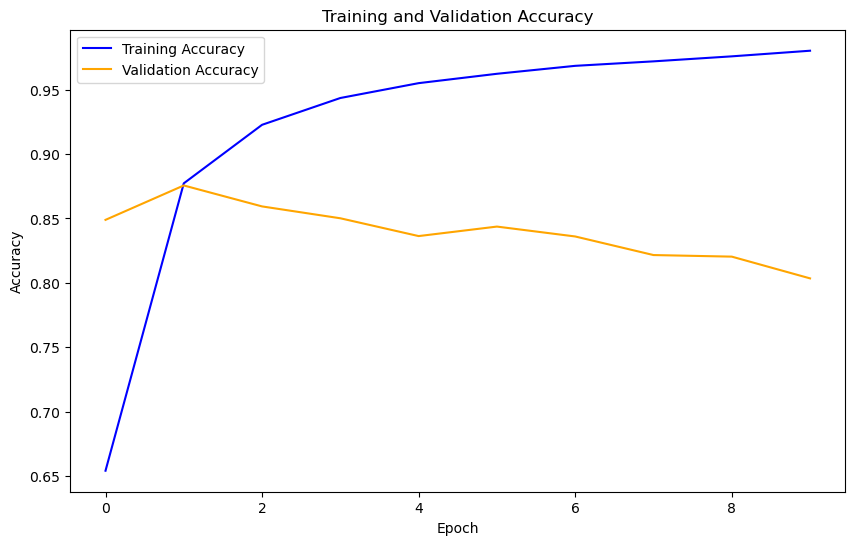

In [40]:

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# <p style="font-family:newtimeroman;font-size:150%;text-align:left;color:#47abc9;">1.9_CONFUSION_MATRIX</p>

In [42]:
X_test = test_data['OriginalTweet'].copy()
y_test = test_data['Sentiment'].copy()

X_test = X_test.apply(data_cleaner)

X_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post')

y_test.replace(text, inplace=True)

/var/folders/r3/01x71w_x23x5r4hnwz0sksnh0000gn/T/ipykernel_41635/1577117169.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace(text, inplace=True)


In [43]:
# If the model's output is probabilities, use argmax to get class labels
pred = model.predict(X_test).argmax(axis=1)  # Ensure pred is a 1D array of integers


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


In [44]:
loss, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 1.0949804782867432
Test Accuracy: 0.7773279547691345


In [45]:
# Check unique values in y_test and pred
print("Unique values in y_test:", y_test.unique())
print("Unique values in pred:", np.unique(pred))


Unique values in y_test: [2 1 0]
Unique values in pred: [0 1 2]


Unique values in y_test: [2 1 0]
Unique values in pred: [0 1 2]


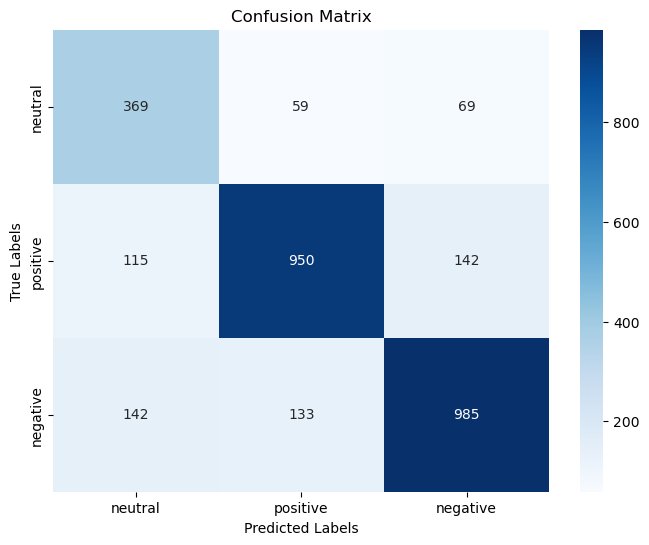

In [46]:
# Check unique values in y_test and pred to ensure they are consistent
print("Unique values in y_test:", y_test.unique())
print("Unique values in pred:", np.unique(pred))

# If necessary, convert y_test to numeric labels (if they are still strings)
if y_test.dtype == 'object':
    y_test = y_test.replace(text_mapping)

# If necessary, make sure pred is in the correct format (e.g., integer labels)
pred = pred.astype(int)

# Now compute the confusion matrix
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, pred)

# Create DataFrame for visualization of confusion matrix
labels = ['neutral', 'positive', 'negative']
cm = pd.DataFrame(conf, index=labels, columns=labels)

# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
